In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H1>Polynomial fit</H1>

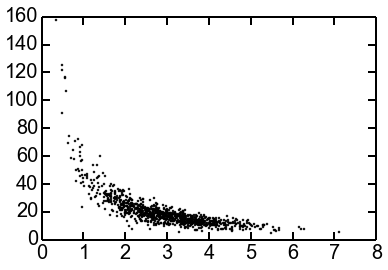

In [10]:
# generate some data
np.random.seed(2)
xdata = np.random.normal(3.0, 1.0, 1000)
ydata = np.random.normal(50.0, 10.0, 1000) / xdata

plt.plot(xdata, ydata, 'ko',ms=2);

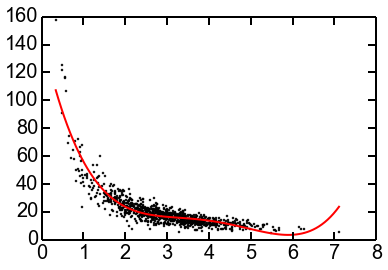

In [14]:
# lets fit to a polynomial function of degree 4
# and plot all together
f4 = np.poly1d(np.polyfit(xdata, ydata, 4))
x = np.linspace(np.min(xdata), np.max(xdata), 100)
plt.plot(xdata, ydata, 'ko', ms=2)
plt.plot(x,f4(x), 'red');

In [35]:
# computer r**2
from sklearn.metrics import r2_score
r2_score(ydata, f4(xdata))

0.82937663963030717

In [39]:
# find the best polynomial
mypoly = dict()
for n in range(1, 10):
    f = np.poly1d( np.polyfit(xdata, ydata, n) )
    mypoly[n] = r2_score(ydata, f(xdata))
    print 'Pol. deg %d -> %f' %(n, mypoly[n])

Pol. deg 1 -> 0.502494
Pol. deg 2 -> 0.692745
Pol. deg 3 -> 0.784235
Pol. deg 4 -> 0.829377
Pol. deg 5 -> 0.855388
Pol. deg 6 -> 0.870073
Pol. deg 7 -> 0.877837
Pol. deg 8 -> 0.881440
Pol. deg 9 -> 0.883026
